In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# testing size
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['barentsburg', 'normandin', 'new norfolk', 'kushima', 'rikitea', 'albany', 'miyazu', 'nemuro', 'bredasdorp', 'taolanaro', 'baturaja', 'ushuaia', 'naze', 'leningradskiy', 'mataura', 'avarua', 'hithadhoo', 'barra do corda', 'bluff', 'jamestown', 'bubaque', 'vardo', 'kahului', 'port elizabeth', 'khash', 'east london', 'grootfontein', 'marfino', 'sorgun', 'hami', 'natal', 'lata', 'norman wells', 'punta arenas', 'macamic', 'tumannyy', 'talnakh', 'cazaje', 'westport', 'dikson', 'upernavik', 'pacifica', 'tasiilaq', 'severo-kurilsk', 'atuona', 'lebu', 'vaini', 'hermanus', 'qaanaaq', 'pisco', 'zilair', 'nikolskoye', 'north bend', 'esperance', 'klaksvik', 'zaysan', 'alta floresta', 'avera', 'bathsheba', 'chokurdakh', 'amderma', 'tevriz', 'fortuna', 'pontes e lacerda', 'katsuura', 'barrow', 'mayna', 'acarau', 'flin flon', 'liverpool', 'dingle', 'grindavik', 'kapaa', 'khatima', 'shakawe', 'sakaiminato', 'saint george', 'tilichiki', 'caxito', 'ciudad ojeda', 'port blair', 'houma', 'mahebourg', 'so

## Perform API Calls

In [28]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [29]:
#  API call structure / Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
# city = "London"

# Build query URL
query_url = url + "appid=" + api_key + "&q="

In [30]:
# #Alternative for testing single unit city for JSON differences
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
# city = "Kwekwe"

# # Build query URL
# query_url = url + "appid=" + api_key + "&q="

# response = requests.get(query_url + city).json()
# pprint(response)

In [31]:
# set up lists to hold reponse info
lat = []
temp = []
humid = []
cloudy = []
windy = []
processed_cities = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()

        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windy.append(response['wind']['speed'])
        # Include print log with city id and name 
        name = response['name']
        cityid = response['id']
        print(f"The city being processed is: {name} with an ID of {cityid}")
        processed_cities.append(response['name'])
    except:
        print(f"This row has an error, see cities list above")
        cities.remove(city)
        pass
#         continue
    



# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

# print(response)

This row has an error, see cities list above
The city being processed is: New Norfolk with an ID of 2155415
The city being processed is: Kushima with an ID of 1895695
The city being processed is: Rikitea with an ID of 4030556
The city being processed is: Albany with an ID of 5106834
The city being processed is: Miyazu with an ID of 1856703
The city being processed is: Nemuro with an ID of 2128975
The city being processed is: Bredasdorp with an ID of 1015776
This row has an error, see cities list above
The city being processed is: Ushuaia with an ID of 3833367
The city being processed is: Naze with an ID of 2337542
The city being processed is: Leningradskiy with an ID of 2123814
The city being processed is: Mataura with an ID of 6201424
The city being processed is: Avarua with an ID of 4035715
The city being processed is: Hithadhoo with an ID of 1282256
The city being processed is: Barra do Corda with an ID of 3406318
The city being processed is: Bluff with an ID of 2175403
The city bei

This row has an error, see cities list above
The city being processed is: Am Timan with an ID of 245338
The city being processed is: Hilo with an ID of 5855927
This row has an error, see cities list above
The city being processed is: Vercelli with an ID of 3164565
The city being processed is: Sitka with an ID of 4267710
The city being processed is: Kodiak with an ID of 4407665
This row has an error, see cities list above
The city being processed is: Baherden with an ID of 162158
The city being processed is: Russell with an ID of 3844421
The city being processed is: Hangu with an ID of 1177203
The city being processed is: Cidreira with an ID of 3466165
The city being processed is: Kruisfontein with an ID of 986717
The city being processed is: Clyde River with an ID of 5924351
The city being processed is: Noumea with an ID of 2139521
The city being processed is: Yatou with an ID of 2225940
The city being processed is: Diamantino with an ID of 3464724
The city being processed is: Yar-Sale

The city being processed is: Magalia with an ID of 5369690
This row has an error, see cities list above
The city being processed is: Idlib with an ID of 169389
The city being processed is: Blagoyevo with an ID of 576093
The city being processed is: Alofi with an ID of 4036284
The city being processed is: Lamar with an ID of 5427957
This row has an error, see cities list above
The city being processed is: Banepa with an ID of 1283679
The city being processed is: Sioux Lookout with an ID of 6148373
The city being processed is: Alice Springs with an ID of 2077895
The city being processed is: Coffs Harbour with an ID of 2171085
The city being processed is: Maswa with an ID of 151211
The city being processed is: Atar with an ID of 2381334
The city being processed is: Lorengau with an ID of 2092164
The city being processed is: Penzance with an ID of 2640377
The city being processed is: Camacha with an ID of 2270385
The city being processed is: Mulanje with an ID of 925789
The city being proc

The city being processed is: Mozarlandia with an ID of 3456642
The city being processed is: San Carlos with an ID of 3628503
The city being processed is: Verkhnevilyuysk with an ID of 2013639
The city being processed is: Dergachi with an ID of 566456
The city being processed is: Mildura with an ID of 2157698
The city being processed is: Mishelevka with an ID of 2019945
The city being processed is: Cotonou with an ID of 2394819
This row has an error, see cities list above
This row has an error, see cities list above
The city being processed is: Kidal with an ID of 2455290
The city being processed is: Abha with an ID of 110690
The city being processed is: Abu Dhabi with an ID of 292968
The city being processed is: Ellensburg with an ID of 5793639
The city being processed is: Pyaozerskiy with an ID of 503581
The city being processed is: Huaral with an ID of 3939285
The city being processed is: Turek with an ID of 3082998
The city being processed is: Meadow Lake with an ID of 6071421
This 

The city being processed is: Gusinoye Ozero with an ID of 2023778
The city being processed is: North Myrtle Beach with an ID of 4589446


In [32]:
# weather_dict.isna()
len(cities)




566

In [33]:
len(processed_cities)

506

In [34]:
len(temp)

506

In [35]:
len(lat)

506

In [36]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": processed_cities,
    "lat": lat,
    "temp": temp,
    "humid": humid,
    "cloudy": cloudy,
    "windy": windy
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,city,lat,temp,humid,cloudy,windy
0,New Norfolk,-42.78,33.80,76,0,4.70
1,Kushima,31.50,76.67,100,32,3.71
2,Rikitea,-23.12,74.96,96,0,14.90
3,Albany,42.65,91.02,43,40,11.41
4,Miyazu,35.58,68.12,96,24,2.15
5,Nemuro,43.32,60.74,96,92,10.20
6,Bredasdorp,-34.53,57.20,82,20,4.70
7,Ushuaia,-54.81,32.25,86,90,27.51
8,Naze,5.43,71.54,97,92,2.71
9,Leningradskiy,69.38,37.88,100,92,10.65


In [37]:
# Finally, export this file to a CSV -- without the DataFrame index.
weather_data.to_csv("weather_data.csv", index=False, header=True)

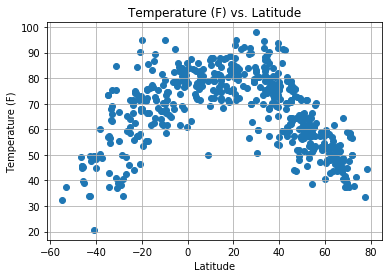

In [38]:
# * Temperature (F) vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevsLatitude.png")

# Show plot
plt.show()

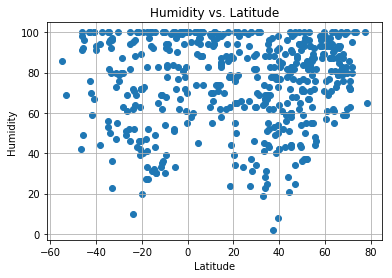

In [39]:
# Humidity (%) vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humid"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvsLatitude.png")

# Show plot
plt.show()


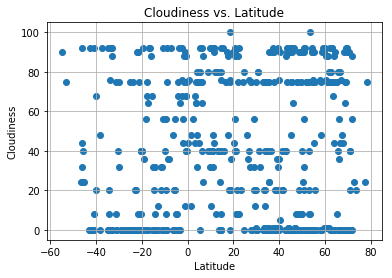

In [40]:
# Cloudiness (%) vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudy"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessvsLatitude.png")

# Show plot
plt.show()


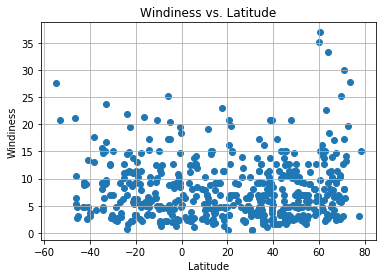

In [41]:
# Wind Speed (mph) vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["windy"], marker="o")

# Incorporate the other graph properties
plt.title("Windiness vs. Latitude")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindinessvsLatitude.png")

# Show plot
plt.show()
